Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

Your tasks in this project are as follows:

Data wrangling, which consists of:
- Gathering data
- Assessing data
- Cleaning data   


Storing, analyzing, and visualizing your wrangled data       
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

### File 1. Enhanced Twitter Archive  

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

In [2]:
df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### File 2. The tweet image predictions using url

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#the name of the file
url.split("/")[-1]

'image-predictions.tsv'

In [5]:
with open(url.split("/")[-1],"wb") as file:
    file.write(response.content)
    
os.path.exists('image-predictions.tsv')

True

In [6]:
#read tsv file using pandas read_csv with seperator \t
df_pred=pd.read_csv("image-predictions.tsv", sep = "\t")
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### File 3. Additional Data via the Twitter API

Using the WeRateDogs Twitter archive and specifically the tweet IDs within it, I query Twitter's API to gather this additional data including retweet count, favorite count, user id, friends count, and followers count. 

In [38]:
#not supposed to share keys
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [47]:
api.get_status(892420643555336193, tweet_mode='extended')._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

Get `retweet_count`,`favorite_count`,`user_id`,`friends_count`and `followers_count` from Tweeter API._json

In [99]:
id_list = list(df_enhanced.tweet_id)
tweet_df,no_stats = {},{}
start_time = timeit.default_timer()
for tweetid in id_list:
    try:
        status = api.get_status(tweetid, tweet_mode='extended')._json
        tweet_df[tweetid] = {'retweet_count':status['retweet_count'],
                             'favorite_count':status['favorite_count'],
                             'user_id':status['user']['id'],
                             'friends_count':status['user']['friends_count'],
                             'followers_count':status['user']['followers_count']}
    except:
        no_stats[tweetid] = 'no status'      

print("Completed! Running Time: {:.2f} seconds".format(timeit.default_timer()- start_time))

Completed! Running Time: 562.19 seconds


Transform dictionary into Pandas DataFrame

In [100]:
retweet_df = pd.DataFrame.from_dict(tweet_df, orient = 'index')
retweet_df.reset_index(inplace=True)
retweet_df.rename(columns = {'index':'tweet_id'},inplace = True)
retweet_df.head()

,tweet_id,retweet_count,favorite_count,user_id,friends_count,followers_count
0,760190180481531904,1744,5565,4196983835,18,8944594
1,760252756032651264,847,3865,4196983835,18,8944594
2,760290219849637889,11170,26178,4196983835,18,8944594
3,760521673607086080,1362,4123,4196983835,18,8944594
4,760539183865880579,3523,7401,4196983835,18,8944594


In [159]:
len(id_list)

2356

In [158]:
len(no_stats.keys())

1493

In [101]:
retweet_df.to_csv('additional_tweeter_data.csv')

### Accessing Data

#### Enhanced Twitter Archive
`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats
- tweet id (#835246439529840640) has a rating denominator of $0$.
- expanded_urls has duplicates within some cells.
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- In name column, there are 55 names showing "a".
- get prediction with highest confidence and reduce columns.

`Tidiness`: 
- source column too complicated to understand
- text column contains links to the tweet

In [55]:
pd.set_option("display.max_colwidth", -1)

In [50]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [58]:
df_enhanced.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [60]:
sum(df_enhanced.duplicated())

0

In [65]:
df_enhanced.expanded_urls.sample(10)

988     https://twitter.com/dog_rates/status/748977405889503236/photo/1                                                                
1300    https://twitter.com/dog_rates/status/707693576495472641/photo/1                                                                
993     https://twitter.com/dog_rates/status/748575535303884801/photo/1                                                                
965     https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1
1919    https://twitter.com/dog_rates/status/674269164442398721/photo/1                                                                
269     https://twitter.com/abc/status/841311395547250688                                                                              
653     https://twitter.com/dog_rates/status/792050063153438720/photo/1,https://twitter.com/dog_rates/status/792050063153438720/photo/1
2307    https://twitter.com/dog_rates/status/666

In [20]:
df_enhanced.in_reply_to_status_id.sample(10)

603    NaN
1413   NaN
1499   NaN
872    NaN
621    NaN
853    NaN
1272   NaN
2322   NaN
1596   NaN
630    NaN
Name: in_reply_to_status_id, dtype: float64

In [24]:
df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
df_enhanced[df_enhanced.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [34]:
df_enhanced.name.value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Penny       10
Tucker      10
Winston      9
Name: name, dtype: int64

In [29]:
df_enhanced.doggo.value_counts()[:10]

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
df_enhanced.floofer.value_counts()[:10]

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
df_enhanced.pupper.value_counts()[:10]

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
df_enhanced.puppo.value_counts()[:10]

None     2326
puppo      30
Name: puppo, dtype: int64

#### The tweet image predictions
`Quality`:
- id column should be string
- predictions are a mix of upper and lower case
- 2075 tweet id has images

`Tidiness`: 
- all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

In [162]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False


In [103]:
df_pred.tweet_id.nunique()

2075

In [108]:
pred_id = set(df_pred.tweet_id)
archive_id = set(df_enhanced.tweet_id)
common_id = pred_id.intersection(archive_id)
print("prediction data has {} tweet ids, enhanced data has {} tweet ids, and they share {} common tweet ids."\
      .format(len(pred_id),len(archive_id),len(common_id)))

prediction data has 2075 tweet ids, enhanced data has 2356 tweet ids, and they share 2075 common tweet ids.


#### Additional Data via the Twitter API
`Quality`:
- only 863 tweet id has status

`Tidiness`: 
- all 863 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

In [156]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 6 columns):
tweet_id           863 non-null int64
retweet_count      863 non-null int64
favorite_count     863 non-null int64
user_id            863 non-null int64
friends_count      863 non-null int64
followers_count    863 non-null int64
dtypes: int64(6)
memory usage: 40.5 KB


In [161]:
len(id_list)

2356

In [160]:
len(no_stats.keys())

1493

### Cleaning Data

#### Enhanced Twitter Archive
`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats
- tweet id (#835246439529840640) has a rating denominator of $0$.
- expanded_urls has duplicates within some cells.
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- Transform doggo, floofer, pupper, puppo into one dog class column
- In name column, there are 55 names showing "a".(can't fix)
- get prediction with highest confidence and reduce columns.

`Tidiness`: 
- source column too complicated to understand
- text column contains links to the tweet

#### The tweet image predictions
`Quality`:
- id column should be string
- predictions are a mix of upper and lower case
- 2075 tweet id has images

`Tidiness`: 
- all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

#### Additional Data via the Twitter API
`Quality`:
- only 863 tweet id has status

`Tidiness`: 
- all 863 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

Start Cleaning:

`Tidiness`: 
- From df_pred, all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.
- From retweet_df, all 863 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

In [2]:
df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_pred=pd.read_csv("image-predictions.tsv", sep = "\t")
retweet_df=pd.read_csv("additional_tweeter_data.csv")

In [3]:
master_df = pd.merge(df_enhanced, df_pred, how = 'inner', on = 'tweet_id')
master_df = pd.merge(master_df, retweet_df, how = 'inner', on = 'tweet_id')

In [4]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,favorite_count,user_id,friends_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,banana,0.076110,False,862,7421,35160,4196983835,18,8944594
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,papillon,0.068957,True,861,5519,30433,4196983835,18,8944594
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,kelpie,0.031379,True,860,3644,22885,4196983835,18,8944594
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,spatula,0.040836,False,859,7595,38454,4196983835,18,8944594
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,German_short-haired_pointer,0.175219,True,858,8173,36716,4196983835,18,8944594


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 708
Data columns (total 34 columns):
tweet_id                      709 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     709 non-null object
source                        709 non-null object
text                          709 non-null object
retweeted_status_id           64 non-null float64
retweeted_status_user_id      64 non-null float64
retweeted_status_timestamp    64 non-null object
expanded_urls                 709 non-null object
rating_numerator              709 non-null int64
rating_denominator            709 non-null int64
name                          709 non-null object
doggo                         709 non-null object
floofer                       709 non-null object
pupper                        709 non-null object
puppo                         709 non-null object
jpg_url                       709 non-null object
i

`Tidiness`: 
- source column too complicated to understand

In [6]:
master_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [7]:
master_df['source'] = master_df.source.str.extract(r'>(.*)<')

In [8]:
master_df.source.tail(5)

704    Twitter for iPhone
705    Twitter for iPhone
706    Twitter Web Client
707    Twitter for iPhone
708    Twitter for iPhone
Name: source, dtype: object

`Tidiness`: 
- text column contains links to the tweet

In [9]:
pd.set_option("display.max_colwidth", -1)
master_df.text.sample(5)

273    Say hello to Reggie. He hates puns. 12/10 lighten pup Reggie https://t.co/X4vNEzAod5                                                                             
53     Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
201    Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e
356    This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA                     
287    Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9               
Name: text, dtype: object

In [10]:
master_df['text_link'] = master_df.text.str.extract(r'(https://.*)')
master_df['text'] = master_df.text.str.extract(r'(.*)https://')

In [11]:
master_df[['text','text_link']].sample(10)

,text,text_link
338,https://t.co/XQlmPTLHPl,https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://t.co/t1bfwz5S2A
328,RT @dog_rates: Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately,https://t.co/mH0IOyFdIG
38,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo,https://t.co/YSI00BzTBZ
509,This is Newt. He's a strawberry. 11/10,https://t.co/2VhmlwxA1Q
396,This is Bauer. He had nothing to do with the cookies that disappeared. 13/10 very good boy,https://t.co/AIMF8ouzvl
293,This is Boots. She doesn't know what to do with treats so she just holds them. Very good girl. 12/10 would give more treats,https://t.co/eAA8lratd3
641,This is Penny. She's an OU cheerleader. About to do a triple back handspring down the stairs. 11/10 hype af,https://t.co/B2f3XkGU5c
698,This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup,https://t.co/ErPLjjJOKc
105,Meet Harold. He's h*ckin cooperative. 13/10 good work Harold,https://t.co/ZYg3NZGICa


`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects

In [12]:
master_df.retweeted_status_timestamp.dtypes

dtype('O')

In [13]:
master_df.timestamp.dtypes

dtype('O')

In [14]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Unnamed: 0', 'retweet_count',
       'favorite_count', 'user_id', 'friends_count', 'followers_count',
       'text_link'],
      dtype='object')

In [15]:
master_df.retweeted_status_timestamp = pd.to_datetime(master_df.retweeted_status_timestamp) 
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [16]:
master_df.retweeted_status_timestamp.dtypes

datetime64[ns, UTC]

In [17]:
master_df.timestamp.dtypes

datetime64[ns, UTC]

`Quality`:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats


In [18]:
master_df[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].dtypes

in_reply_to_status_id       float64
in_reply_to_user_id         float64
retweeted_status_id         float64
retweeted_status_user_id    float64
dtype: object

In [19]:
master_df.in_reply_to_status_id = master_df.in_reply_to_status_id.astype(str)
master_df.in_reply_to_user_id = master_df.in_reply_to_user_id.astype(str)
master_df.retweeted_status_id = master_df.retweeted_status_id.astype(str)
master_df.retweeted_status_user_id = master_df.retweeted_status_user_id.astype(str)

In [20]:
master_df[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].dtypes

in_reply_to_status_id       object
in_reply_to_user_id         object
retweeted_status_id         object
retweeted_status_user_id    object
dtype: object

`Quality`:
- tweet id (#835246439529840640) has a rating denominator of $0$.

**When I merge I use inner join, so the client with rating denominator of $0$ has already been dropped due to another fields has NAs.**

In [21]:
master_df[master_df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,favorite_count,user_id,friends_count,followers_count,text_link


`Quality`:
- expanded_urls has duplicates within cell

In [23]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Unnamed: 0', 'retweet_count',
       'favorite_count', 'user_id', 'friends_count', 'followers_count',
       'text_link'],
      dtype='object')

In [24]:
master_df.expanded_urls.sample(10)

681    https://twitter.com/dog_rates/status/765222098633691136/photo/1                                                                                                                                                                                                                    
221    https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1                                                                                    
47     https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1                    
108    https://twitter.com/dog_rates/status/867051520902168576/photo/1                                                                                 

In [25]:
master_df['expanded_urls'] = master_df.expanded_urls.str.extract(r'(https://twitter.com.*/photo/1)')

In [26]:
master_df['expanded_urls'] = master_df['expanded_urls'].str.split(',').str[0]

In [28]:
#check to make sure it is consistent
master_df.expanded_urls.iloc[[681,221,47,108,353,581,220,303,161,568]]

681    https://twitter.com/dog_rates/status/765222098633691136/photo/1     
221    https://twitter.com/dog_rates/status/839239871831150596/photo/1     
47     https://twitter.com/dog_rates/status/882045870035918850/photo/1     
108    https://twitter.com/dog_rates/status/867051520902168576/photo/1     
353    https://twitter.com/dog_rates/status/818536468981415936/photo/1     
581    https://twitter.com/dog_rates/status/781163403222056960/photo/1     
220    https://twitter.com/alexmartindawg/status/839289919298224128/photo/1
303    https://twitter.com/dog_rates/status/826115272272650244/photo/1     
161    https://twitter.com/dog_rates/status/852912242202992640/photo/1     
568    https://twitter.com/dog_rates/status/674291837063053312/photo/1     
Name: expanded_urls, dtype: object

`Quality`:
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- Transform doggo, floofer, pupper, puppo into one dog class column

In [29]:
master_df['name'].value_counts()[:10]

None       136
Tucker     6  
Bo         6  
Penny      6  
Charlie    6  
Stanley    4  
Dave       4  
Winston    4  
Rusty      4  
Scout      4  
Name: name, dtype: int64

In [30]:
master_df['doggo'].value_counts()

None     654
doggo    55 
Name: doggo, dtype: int64

In [31]:
master_df['floofer'].value_counts()

None       705
floofer    4  
Name: floofer, dtype: int64

In [32]:
master_df[['name','doggo','floofer','pupper','puppo']].sample(5)

,name,doggo,floofer,pupper,puppo
604,Wesley,None,None,None,None
134,None,None,None,None,None
269,Pete,doggo,None,None,None
194,None,None,None,None,None
164,Wiggles,None,None,None,None


In [33]:
#replace None for np.nan in name column
master_df['name'] = master_df['name'].replace('None',np.nan)

In [34]:
master_df['doggo'] = master_df['doggo'].replace('None',"")
master_df['floofer'] = master_df['floofer'].replace('None',"")
master_df['pupper'] = master_df['pupper'].replace('None',"")
master_df['puppo'] = master_df['puppo'].replace('None',"")

In [35]:
#transform doggo, floofer, pupper, puppo into one dog class column
master_df['dog_class'] = master_df['doggo']+master_df['floofer']+master_df['pupper']+master_df['puppo']

In [36]:
master_df['dog_class'] = master_df['dog_class'].replace("",np.nan)

In [37]:
master_df['dog_class'].value_counts()

doggo           46
pupper          43
puppo           17
doggopupper     7 
floofer         3 
doggofloofer    1 
doggopuppo      1 
Name: dog_class, dtype: int64

In [38]:
master_df['name'].value_counts()[:10]

Tucker     6
Charlie    6
Bo         6
Penny      6
Cooper     4
Scout      4
Loki       4
Daisy      4
Bailey     4
Stanley    4
Name: name, dtype: int64

In [39]:
master_df['floofer'].value_counts()

           705
floofer    4  
Name: floofer, dtype: int64

In [40]:
master_df[['name','doggo','floofer','pupper','puppo','dog_class']].iloc[[569,653,325,290,180]]

,name,doggo,floofer,pupper,puppo,dog_class
569,Dave,,,,,NaN
653,Jackson,,,,,NaN
325,Gabe,,,pupper,,pupper
290,Sailer,,,,,NaN
180,Odin,,,,,NaN


In [41]:
master_df.drop(columns = ['doggo','floofer','pupper','puppo'],inplace = True)

`Quality`:
- get prediction with highest confidence and reduce columns.

In [42]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'Unnamed: 0', 'retweet_count', 'favorite_count', 'user_id',
       'friends_count', 'followers_count', 'text_link', 'dog_class'],
      dtype='object')

In [43]:
master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [44]:
def dog_pred(x):
    if x[1] > max(x[4],x[7]):
        return x[0]
    elif x[4] > max(x[1],x[7]):
        return x[3]
    else:
        return x[6]
def probability(x):
    if x[1] > max(x[4],x[7]):
        return x[1]
    elif x[4] > max(x[1],x[7]):
        return x[4]
    else:
        return x[7]
def TrueFalse(x):
    if x[1] > max(x[4],x[7]):
        return x[2]
    elif x[4] > max(x[1],x[7]):
        return x[5]
    else:
        return x[8]

In [45]:
master_df['pred']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(dog_pred,axis = 1)
master_df['p_conf']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(probability,axis = 1)
master_df['actual']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(TrueFalse,axis = 1)

In [46]:
master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','pred','p_conf','actual']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred,p_conf,actual
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,orange,0.097049,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,paper_towel,0.170278,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712,True


In [47]:
master_df.drop(columns = ['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],inplace = True)

In [48]:
master_df.pred.value_counts()[:10]

golden_retriever      74
Labrador_retriever    37
Pembroke              36
Chihuahua             23
chow                  23
Samoyed               19
cocker_spaniel        17
French_bulldog        14
malamute              14
Cardigan              13
Name: pred, dtype: int64

`Quality`:
- predictions are a mix of upper and lower case

In [49]:
master_df.pred = master_df.pred.str.replace("_", " ").str.lower()

In [50]:
master_df.pred.value_counts()[:10]

golden retriever      74
labrador retriever    37
pembroke              36
chihuahua             23
chow                  23
samoyed               19
cocker spaniel        17
french bulldog        14
malamute              14
cardigan              13
Name: pred, dtype: int64

In [53]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweet_count,favorite_count,user_id,friends_count,followers_count,text_link,dog_class,pred,p_conf,actual
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,7421,35160,4196983835,18,8944594,https://t.co/MgUWQ76dJU,NaN,orange,0.097049,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,5519,30433,4196983835,18,8944594,https://t.co/0Xxu71qeIV,NaN,chihuahua,0.323581,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,3644,22885,4196983835,18,8944594,https://t.co/wUnZnhtVJB,NaN,chihuahua,0.716012,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,7595,38454,4196983835,18,8944594,https://t.co/tD36da7qLQ,NaN,paper towel,0.170278,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",nan,nan,NaT,https://twitter.com/dog_rates/status/891327558926688256/photo/1,...,8173,36716,4196983835,18,8944594,https://t.co/AtUZn91f7f,NaN,basset,0.555712,True


In [55]:
#save master file
master_df.to_csv('master.csv', index = False)

### Analysis

1. Based on the predictions with the most confidence, top 1 predictions is golden retriever. 

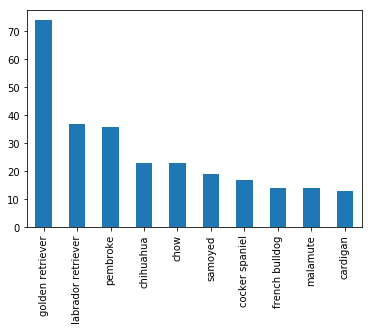

In [56]:
master_df['pred'].value_counts()[:10].plot(kind = 'bar');

In [57]:
df_pred['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
cocker_spaniel        30 
Name: p1, dtype: int64

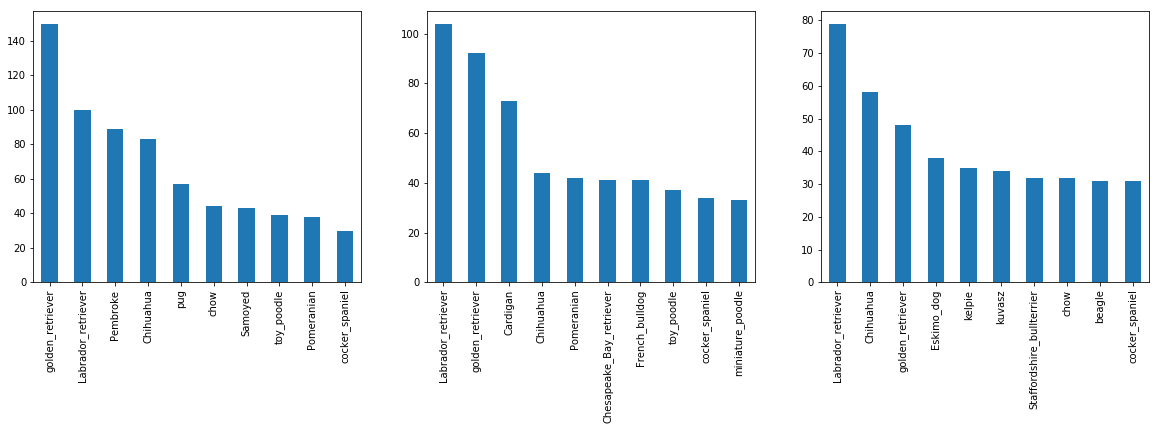

In [58]:
plt.subplot(1,3,1)
df_pred['p1'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));
plt.subplot(1,3,2)
df_pred['p2'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));
plt.subplot(1,3,3)
df_pred['p3'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));

2. Based on the top 1 predictions: golden retriever, if I sort by the most retweet count as well as favorite count, I found that golden retriever is also the most popular dog.

In [59]:
dog_info = master_df[['pred','actual','retweet_count','favorite_count']]

In [60]:
dog_info1 = dog_info.groupby('pred').agg({'actual':['sum','count'],'retweet_count':'sum','favorite_count':'sum'})

In [61]:
dog_info1.sort_values([('favorite_count','sum'),('retweet_count','sum')],ascending = [False,False])[:10]

actual       retweet_count favorite_count
                      sum count           sum            sum
pred                                                        
golden retriever    74.0   74    363066        1145276      
pembroke            36.0   36    165856        691380       
labrador retriever  37.0   37    160047        549143       
chihuahua           23.0   23    150557        459822       
french bulldog      14.0   14    94773         395938       
samoyed             19.0   19    138587        380207       
chow                23.0   23    84461         289617       
cocker spaniel      17.0   17    95750         252063       
cardigan            13.0   13    70150         196740       
pomeranian          9.0    9     60269         186431

3. Checking predictions accuracy, based on the cleaned data, the total accuracy is around 80% with golden retriever  100% accuracy.

In [62]:
dog_pred = dog_info1['actual'].reset_index()

In [63]:
dog_pred['percentage'] = dog_pred['sum']/dog_pred['count']

In [64]:
dog_pred.sort_values(by=['percentage','sum'],ascending = False)[:10]

,pred,sum,count,percentage
73,golden retriever,74.0,74,1.0
94,labrador retriever,37.0,37,1.0
132,pembroke,36.0,36,1.0
41,chihuahua,23.0,23,1.0
43,chow,23.0,23,1.0
151,samoyed,19.0,19,1.0
45,cocker spaniel,17.0,17,1.0
67,french bulldog,14.0,14,1.0
106,malamute,14.0,14,1.0
39,cardigan,13.0,13,1.0


In [65]:
dog_pred['sum'].sum()

564.0

In [66]:
total_acc = dog_pred['sum'].sum()/dog_pred['count'].sum()
print("Based on cleaned data, prediction accuracy is {:.2f}%".format(total_acc*100))

Based on cleaned data, prediction accuracy is 79.55%
